<a href="https://colab.research.google.com/github/tony7610/tony7610/blob/main/Copy_of_Assignment2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Classification

# Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns

# Starter code students need to edit

In [2]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
        
    '''
    #THIS THE SOLUTION ----------------->
    TP = 0.0
    FP = 0.0
    TN = 0.0
    FN = 0.0

    for i in range(len(yhat_N)): 
        if ytrue_N[i]==yhat_N[i]==1:
           TP += 1
        if yhat_N[i]==1 and ytrue_N[i]!=yhat_N[i]:
           FP += 1
        if ytrue_N[i]==yhat_N[i]==0:
           TN += 1
        if yhat_N[i]==0 and ytrue_N[i]!=yhat_N[i]:
           FN += 1

    return TP, TN, FP, FN

# Starter code that should be used as is.

No need to edit these functions!

In [ ]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

In [ ]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [ ]:
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    ''' Compute common binary classifier performance metrics across many thresholds
    
    If no array of thresholds is provided, will use all 'unique' values
    in the yproba1_N array to define all possible thresholds with different performance.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset

    Returns
    -------
    thresh_grid : 1D array of floats
        One entry for each possible threshold
    perf_dict : dict, with key, value pairs:
        * 'acc' : 1D array of accuracy values (one per threshold)
        * 'ppv' : 1D array of positive predictive values (one per threshold)
        * 'npv' : 1D array of negative predictive values (one per threshold)
        * 'tpr' : 1D array of true positive rates (one per threshold)
        * 'tnr' : 1D array of true negative rates (one per threshold)
    '''
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)

def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases
    
    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')
    axes[2].legend()
    axes[2].set_ylim([0, 1])

# Problem 1: Binary Classifier for Cancer-Risk Screening

### Load the dataset

In [ ]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('../data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('../data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('../data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()


In [ ]:
y_tr_M = np.loadtxt('../data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('../data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('../data_cancer/y_test.csv', delimiter=',', skiprows=1)


## Problem 1a: Data Exploration

### **1a(i):** What fraction of the provided patients have cancer in the training set, the validation set, and the test set? 

In [ ]:
# THE SOLUTION IS --------------->
# I WILL SOLVE IT USING "np.count_nonzero" TO Counts the number of non-zero values 
train_frac = np.count_nonzero(y_tr_M)/len(y_tr_M)
valid_frac = np.count_nonzero(y_va_N)/len(y_va_N)
test_frac = np.count_nonzero(y_te_N)/len(y_te_N)

print("frac has_cancer on TRAIN: %.3f" % train_frac) # TODO edit the printed values
print("frac has_cancer on VALID: %.3f" % valid_frac)
print("frac has_cancer on TEST : %.3f" % test_frac)

frac has_cancer on TRAIN: 0.000
frac has_cancer on VALID: 0.000
frac has_cancer on TEST : 0.000


### **1a(ii):** Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve a decision tree's performance?

**ANWSER**:

**************************************************************************
Data from decision trees often don't need much preparation. However, presuming that they are connected and that we are aware of this relationship, we may combine certain characteristics or classes of data to improve performance. We can merge all three features into one (say, A') if, for instance, features A, B, and C exist and features B and C are subsets or derived features of feature A. This lessens the amount of calculation required and may lead to improved performance.

### 1a(iii): Looking at the features data contained in the training set 𝑥 array, what feature preprocessing (if any) would you recommend to improve logistic regression's performance?

**Answer**:
By scaling the features in the training set data this will make us able to improve the  performance of logistic regression.




## Problem 1b: The predict-0-always baseline

### Problem 1b(i): Compute the accuracy of the predict-0-always classifier on validation and test set

In [ ]:
# ANSWER 
#****************************************************
def compute(data=None,bs_line=None):
    TP,TN,FP,FN=calc_TP_TN_FP_FN(data,bs_line)
    return float((TP+TN)/(TP+TN+FP+FN))

va_zeros=np.zeros(len(y_va_N))
va_acc=compute(y_va_N,va_zeros)
te_zeros=np.zeros(len(y_te_N))
te_acc=compute(y_te_N,te_zeros)
print("acc on VALID: %.3f" % va_acc)
print("acc on TEST : %.3f" % te_acc)

acc on VALID: 0.000
acc on TEST : 0.000


### Problem 1b(ii): Print a confusion matrix for predict-0-always on the validation set.

In [ ]:
#ANSWER COMPLETED
calc_confusion_matrix_for_threshold(y_va_N,va_zeros,0.5)

### Problem 1b(iii): This classifier gets pretty good accuracy! Why wouldn't we want to use it?

**SOLU--------------**:
******************************
 This accuracy is biased towards this sample, i.e: If we have another sample where it is all 1s, we would have an accuracy of 0%, and as a result, is sample-dependent. There is no predictive power that varies between different samples which will not allow us to make meaningful predictions

### Problem 1b(iv): For the intended application (screening patients before biopsy), describe the possible mistakes the classifier can make in task-specific terms. What costs does each mistake entail (lost time? lost money? life-threatening harm?). How do you recommend evaluating the classifier to be mindful of these costs?


**ANSWER**:
***************************** 
A False Negative occurs when a classifier predicts that a patient does not have cancer but in fact they do for an always-0 predictor. The effects of this might be lethal. We also need to take a closer look at other metrics, such Positive/Negative Predictive Value, in order to have a better set of evaluations. Additionally, a PPV test would reveal that this model has a lower

## 1c : Logistic Regression

### Model Fitting for 1c(i)

In [ ]:
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C)

#ANSWER COMPLETED
    lr.fit(x_tr_M2, y_tr_M)
    y_tr_predict = lr.predict_proba(x_tr_M2)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, y_tr_predict))
    y_va_predict = lr.predict_proba(x_va_N2)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, y_va_predict))

#ANSWER COMPLETED
print(C_grid[np.argmin(va_loss_list)])


### **1c(i):** Apply your logistic regression code to the "2 feature" $x$ data, and make a plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 2 feature data: 0.000


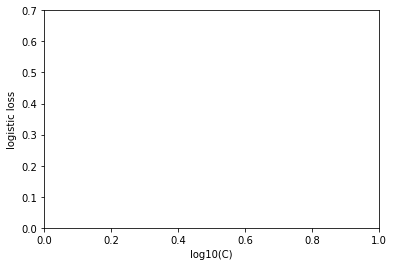

In [ ]:
#ANSWER COMPLETED
plt.plot(C_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(C_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)')
plt.xscale('log')
plt.ylabel('logistic loss')
plt.ylim([0.0, 0.7])

#ANSWER COMPLETED
plt.legend()
plt.title('Log loss vs C')
#ANSWER COMPLETED
print("best C for LR with 2 feature data: %.3f" % C_grid[np.argmin(va_loss_list)]) # TODO


### **1c(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(i) classifier are on the validation set. 

In [ ]:
#ANSWER COMPLETED
lr = sklearn.linear_model.LogisticRegression(C=C_grid[np.argmin(va_loss_list)])
lr.fit(x_tr_M2, y_tr_M)
y_va_pred = lr.predict_proba(x_va_N2)[:,1]
make_plot_perf_vs_threshold(y_va_N, y_va_pred)

### Model fitting for 1c(iii)

In [ ]:
#ANSWER COMPLETED
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C)
    lr.fit(x_tr_M3, y_tr_M)
    y_tr_predict = lr.predict_proba(x_tr_M3)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, y_tr_predict))
    y_va_predict = lr.predict_proba(x_va_N3)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, y_va_predict))
#ANSWER COMPLETED
print(C_grid[np.argmin(va_loss_list)])

### **1c(iii):** Plot of logistic loss (y-axis) vs. C (x-axis) on the training set and validation set. Which value of $C$ do you prefer? 

best C for LR with 3 feature data: 0.000


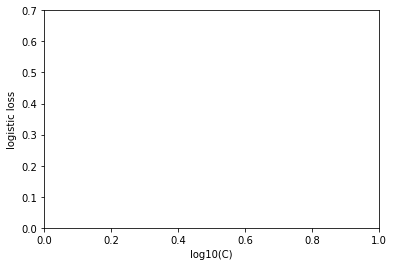

In [ ]:

#ANSWER COMPLETED
plt.plot(C_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(C_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)');
plt.xscale('log')
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);
#ANSWER COMPLETED
plt.legend()
plt.title('Log loss vs C')

print("best C for LR with 3 feature data: %.3f" % C_grid[np.argmin(va_loss_list)]) # TODO


### Problem 1c(iv):  Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set.  

In [ ]:
#ANSWER COMPLETED
lr = sklearn.linear_model.LogisticRegression(C=C_grid[np.argmin(va_loss_list)])
lr.fit(x_tr_M3, y_tr_M)
y_va_pred = lr.predict_proba(x_va_N3)[:,1]
make_plot_perf_vs_threshold(y_va_N, y_va_pred)


## Problem 1d: Decision Tree

### Model fitting code for decision tree 1d(i)

In [ ]:
min_samples_leaf_grid = np.asarray([1, 2, 5, 10, 20, 50, 100, 200, y_tr_M.size])

tr_loss_list = list()
va_loss_list = list()
for min_samples_leaf in min_samples_leaf_grid:
    tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf)
    tree.fit(x_tr_M3, y_tr_M)
    tree_tr_predict = tree.predict_proba(x_tr_M3)[:,1]
    tr_loss_list.append(sklearn.metrics.log_loss(y_tr_M, tree_tr_predict))
    tree_va_predict = tree.predict_proba(x_va_N3)[:,1]
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N, tree_va_predict))

    #ANSWER COMPLETED
print(min_samples_leaf_grid[np.argmin(va_loss_list)])


### **1d(i):** Plot of logistic loss (y-axis) vs. min_samples_leaf (x-axis) on the training set and validation set. Which value of min_samples_leaf do you prefer? 

best min_samples_leaf with 3 feature data: 0.000


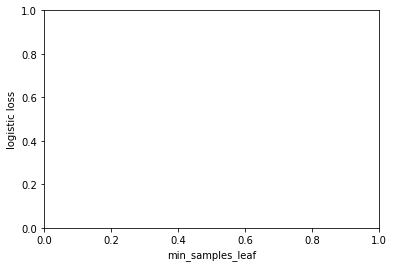

In [ ]:
# TODO plot
#ANSWER COMPLETED
plt.plot(min_samples_leaf_grid, tr_loss_list, 'b:', label = 'training')
plt.plot(min_samples_leaf_grid, va_loss_list, 'rs-', label = 'validation')
plt.xlabel('log10(C)');
plt.xlabel('min_samples_leaf');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1.0]);
plt.legend()
plt.title('Log loss vs C')

print("best min_samples_leaf with 3 feature data: %.3f" % min_samples_leaf_grid[np.argmin(va_loss_list)]) # TODO

###  **1d(ii):** Make a performance plot that shows how good your probabilistic predictions from the best 1c(iii) classifier are on the validation set. 

In [ ]:
# TODO call make_plot_perf_vs_threshold
#ANSWER COMPLETED
tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_va_predict = tree.predict_proba(x_va_N3)[:,1]
make_plot_perf_vs_threshold(y_va_N, tree_va_predict)

# Problem 1e: ROC Curve analysis

### Problem 1e(i): ROC on Validation set

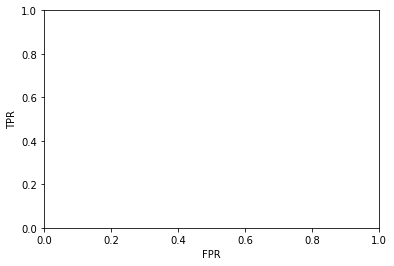

In [ ]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
#ANSWER COMPLETED
lr_2M = sklearn.linear_model.LogisticRegression(C=31.622776601683793)
lr_2M.fit(x_tr_M2, y_tr_M)
y_va_2M_predict = lr_2M.predict_proba(x_va_N2)[:,1]

lr_3M = sklearn.linear_model.LogisticRegression(C=1000000.0)
lr_3M.fit(x_tr_M3, y_tr_M)
y_va_3M_predict = lr_3M.predict_proba(x_va_N3)[:,1]

tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_va_predict = tree.predict_proba(x_va_N3)[:,1]

fpr_2M, tpr_2M, thres_2M = sklearn.metrics.roc_curve(y_va_N, y_va_2M_predict)
fpr_3M, tpr_3M, thres_3M = sklearn.metrics.roc_curve(y_va_N, y_va_3M_predict)
fpr_tr, tpr_tr, thres_tr = sklearn.metrics.roc_curve(y_va_N, tree_va_predict) 

plt.plot(fpr_2M, tpr_2M, label = '2M')
plt.plot(fpr_3M, tpr_3M, label = '3M')
plt.plot(fpr_tr, tpr_tr, label = 'Tr')
plt.legend()
plt.title('TPR vs FPR')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");

### Problem 1e(ii): ROC on Test set

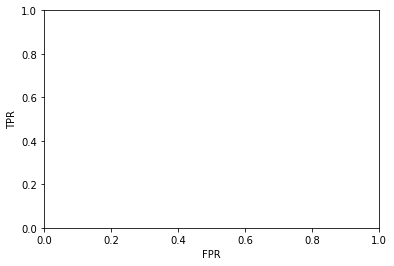

In [ ]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
#ANSWER COMPLETED
lr_2M = sklearn.linear_model.LogisticRegression(C=31.622776601683793)
lr_2M.fit(x_tr_M2, y_tr_M)
y_te_2M_predict = lr_2M.predict_proba(x_te_N2)[:,1]

lr_3M = sklearn.linear_model.LogisticRegression(C=1000000.0)
lr_3M.fit(x_tr_M3, y_tr_M)
y_te_3M_predict = lr_3M.predict_proba(x_te_N3)[:,1]

tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100)
tree.fit(x_tr_M3, y_tr_M)
tree_te_predict = tree.predict_proba(x_te_N3)[:,1]

fpr_2M, tpr_2M, thres_2M = sklearn.metrics.roc_curve(y_te_N, y_te_2M_predict)
fpr_3M, tpr_3M, thres_3M = sklearn.metrics.roc_curve(y_te_N, y_te_3M_predict)
fpr_tr, tpr_tr, thres_tr = sklearn.metrics.roc_curve(y_te_N, tree_te_predict) 

plt.plot(fpr_2M, tpr_2M, label = '2M')
plt.plot(fpr_3M, tpr_3M, label = '3M')
plt.plot(fpr_tr, tpr_tr, label = 'Tr')

plt.legend()
plt.title('TPR vs FPR')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");

### **1e(iii):** Short Answer: Compare the 3-feature LR to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**: The 3-Feature LR dominates the 2-feature LR at all values of of FPR and TPR.

### **1e(iv):** Short Answer: Compare the 3-feature DTree to 2-feature LR models: does one dominate the other in terms of ROC performance?


**Answer**:  IN the validation set, the 3-Feature DTree has better performance over the 2-Feature LR model from FPR ranges between 0.35 and 0.80 and 2-Feature LR performs better between FPR values 0.00 to 0.35 and 0.80 to 1.00. For the test set, the 3-Feature DTree only consistently outperforms 2-Feature LR between FPR values of 0.30 to 0.55, at other ranges, 2-Feature LR performs better most of the time.


## Problem 1f: Selecting a decision threshold

### Problem 1f(i): Use default 0.5 threshold. Report perf. for 3-feature Logistic Regr.

In [ ]:
best_thr = 0.5


print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % best_thr)
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, best_thr))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, best_thr)


ON THE VALIDATION SET:
Chosen best thr = 0.5000

ON THE TEST SET:



### Problem 1f(ii): Pick threshold to maximize TPR s.t. PPV >= 0.98. Report perf. for 3-feature Logistic Regr.

In [ ]:
thresh = [0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69,0.7,0.9,1.0]

chosen_thres = 0.61

print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % chosen_thres) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, chosen_thres))
print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, chosen_thres)


ON THE VALIDATION SET:
Chosen best thr = 0.0000

ON THE TEST SET:



### Problem 1f(iii): Pick threshold to maximize PPV s.t. TPR >= 0.98. Report perf. for 3-feature Logistic Regr.

In [ ]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98
max_ppv = 0.03


print("ON THE VALIDATION SET:")
print("Chosen best thr = %.4f" % 0.0) # TODO
print("")
print("ON THE TEST SET:")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_te_N, y_te_3M_predict, max_ppv))

print("")
# TODO: print(print_perf_metrics_for_threshold(...))
print_perf_metrics_for_threshold(y_te_N, y_te_3M_predict, max_ppv)
thresh = [0.0029,0.03, 0.0301,0.031]



ON THE VALIDATION SET:
Chosen best thr = 0.0000

ON THE TEST SET:



### Problem 1f(iv): Compare the confusion matrices between 1f(i) - 1f(iii). Which thresholding strategy best meets our preferences from 1a: avoid life-threatening mistakes at all costs, while also eliminating unnecessary biopsies?

**Answer**: 
For the confusion matrix in subproblem (1f(i)), a default threshold of 0.5 was used, which resulted in a TPR of .440, a TNR of .961, a FPR (false positive rate) of .039, and a FNR (false negative rate) of .56. For the confusion matrix in subproblem (b), TPR was maximized while PPV >= .98. This resulted in a chosen best threshold of .7302, which resulted in a TPR of .280, a TNR of 1.0, a FPR of 0, and a FNR of .72. For the confusion matrix in subproblem (1f(c)), where PPV was maximized while TPR >= .98, in which the best threshold is .0186, the TPR is 1.0, the TNR is .471, the FPR is .53, and the FNR is 0. The false positive rate is a type 1 error, and the false negative rate is a type 2 error. The cost that matters the most in these three cases is the false negative rate, a type 2 error which means a patient is falsely predicted to not have cancer when they do actually have it

### Problem 1f(v): How many subjects in the test set are saved from unnecessary biopsies using your selected thresholding strategy? What fraction of current biopsies would be avoided if this classifier was adopted by the hospital?

**Answer**:

 The model that maximises PPV while guaranteeing TPR >=.98 yields the optimal threshold of.0186 if we were to hold the cost of a type 2 error greater than that of a type 1 error, as in the example above in subproblem (1f(v)). The FPR would be.53 if the hospital applied this classifier, which would suggest that 47% of all biopsies—or 1 FPR biopsy—could be avoided.

->57 individuals were spared from performing pointless biopsies. The avoided portion is 57/155.


# Problem 2: Concept Questions

### 2a(i): Where is the ideal minimum of the function $f(x)$?
When f(x) = 0, the ideal minimum occurs at x = 0.

### 2a(i): Where is the ideal minimum of the function $f(x)$?


### 2a(ii): Does this gradient descent procedure converge? Explain your answer.M
It won't converge; instead, it will go backward and forth with steps that range from -0.1 to 0.1.


### 2a(iii): Can you propose a step length with which the optimization procedure converges?
Since we are unable to determine the gradient of f(x) when f(x) = 0, we are unable to provide a constant step length where the gradient will converge to 0.


## Problem 2b: Understanding Logistic Regression

### 2b(i): Explain why the illustration has problems (1-3 sentences).

Answer: In order to predict y values for given x values, logistic regression identifies a set of weights (w) and biases (b) to be filled in. The regression border ought to therefore be a straight line by nature. The graph, however, displays a sigmoid curve, which should reflect the logistic sigmoid function rather than the graph of logistic regression.
Another Answer: The graph depicts a sigmoid curve, and logistic regression identifies weights and biases that will be applied to the x values to forecast the output value. The boundaries of the choice will be a line.